## Mini-Project 1 - Monte Carlo Simulation of Radioactive Decay

#### A radioactive isotope is an atom that has excess nuclear energy, making it unstable. This excess energy causes the atom to breakdown in a process called radioactive decay. For more information see [this Wikipedia article](https://en.wikipedia.org/wiki/Radionuclide).

#### If we have a sample of radioactive isotopes, the "radioactive half-life" is the time it takes for half the atoms in the sample to decay. "Radioactive half-life" is often shortened to just "half-life". After two half-lives, there will be one fourth the original sample, after three half-lives one eight the original sample, and so forth. For example: 
![alt text](http://hyperphysics.phy-astr.gsu.edu/hbase/Nuclear/imgnuc/hlcurv.gif)

##### Image credit: http://hyperphysics.phy-astr.gsu.edu/hbase/Nuclear/halfli.html#c1


Different elements have different half-lives. For example, the half-life of uranium-238 is 4.5 billion years. The half-life of plutonium-239 is 24,100 years and the half-life of thallium-201 is 73.1 hours. Given a container of thallium-201, half of the atoms will decay in 73.1 hours. Given a same size container of uranium-238, it will take 4.5 billion years before half the atoms decay.

The half-life of an element doesn't change. However, which atoms in the container actually decay is a truly random process. For any given atom, there is a probability of decay. The probability of decay is given by a constant times the time step. For example, element X has a decay rate, alpha, of 0.01 s<sup>-1</sup>. The probability of a particular atom decaying in 1 second is: probability = 0.01 * 1 = 0.01

1.) Write a Monte Carlo simulation to simulate the decay of 100 atoms of element X with a time step of 1 second. Run your simulation for 300 seconds. Graph the number of remaining atoms at each 1 second time step.

We can also solve the decay rate analytically. At each time step, the number of atoms remaining (not decayed), N, is given by: 
N = (original number of atoms in sample)*e<sup>-y</sup> where y = alpha * number of elapsed seconds. For example, after 1 second: y = -0.01 * 1 = -0.01 and 
N = 100 * e<sup>-0.01</sup>. 
After 2 seconds, y = -0.01 * 2 = -0.02 and
N = 100 * e<sup>-0.02</sup>, etc., etc.

Plot the analytical solution on top of the Monte Carlo solution. In other words, make a single panel plot with the two results plotted on top of each other. Not a multi-panel plot.

Text(0.5,1,'Element X Radioactive Decay')

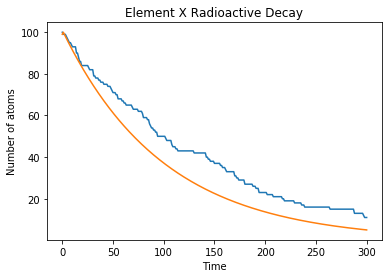

In [24]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# number of starting atoms of element X
x = 100

# probability of decay
p = 0.01

# list to hold how many atoms left at each step
x_left = [x] # first value in the list is our starting number of atoms

# list to hold analytical solutions
n_list = [ 100 * math.exp(-1*p) ] 

# loop for 300 seconds
for second in range(300):
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(x):
        if random.random()<p:
            decay += 1 # number of atoms that decayed this time step
    x -= decay
    x_left.append(x)

    # Analytical solution
    n = 100 * math.exp(-1*0.01*second)
    n_list.append(n)
    
# make the graph
time = np.arange(0,301,1)
plt.plot(time,x_left)
plt.plot(time,n_list)
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.title("Element X Radioactive Decay")

2.) Does your Monte Carlo simulation agree with the analytical solution? What does the Monte Carlo simulation say is the half-life of element X? What does the analytical solution say is the half-life of element X?

No, the Monte Carlo simulation and the analytical solution do not agree. The analytical solution indicates that half the atoms will decay in about 60 seconds. The Monte Carlo simulation predicts about 70 seconds.

3.) Let's try again, but this time with 5,000 atoms in our sample. Repeat question 1. with 5,000 atoms (same alpha, same time step, same probability, same 300 second simulation, just a larger sample of atoms)

Text(0.5,1,'Element X Radioactive Decay')

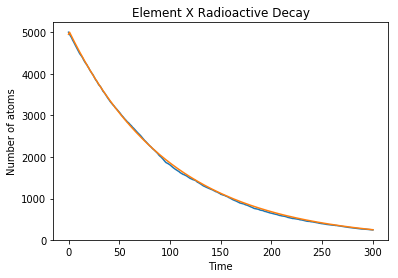

In [27]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# number of starting atoms of element X
x = 5000

# probability of decay
p = 0.01

# list to hold how many atoms left at each step
x_left = [x] # first value in the list is our starting number of atoms

# list to hold analytical solutions
n_list = [ 5000 * math.exp(-1*p) ] 

# loop for 300 seconds
for second in range(300):
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(x):
        if random.random()<p:
            decay += 1 # number of atoms that decayed this time step
    x -= decay
    x_left.append(x)

    # Analytical solution
    n = 5000 * math.exp(-1*0.01*second)
    n_list.append(n)
    
# make the graph
time = np.arange(0,301,1)
plt.plot(time,x_left)
plt.plot(time,n_list)
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.title("Element X Radioactive Decay")

4.) How do the results compare with 5,000 atoms in our sample? Why do you think this is?

There is much better agreement with a larger sample size. This is analogous to flipping a coin. We have equal probability of flipping heads as we do tails. Yet, in the short term, say 20 flips, we could get significantly more heads than tails. However, if we flip the coin one million times we'll see 50% heads and 50% tails. With a sample size of 100 atoms we are prone to statistical fluctuations. Modeling a larger sample size we a true reflection of the atoms decaying.

5.) Modify your simulation to keep track of how many decays happen in every 10-second window. For each scenario (the 100 atom sample and the 5,000 atom sample) run the simulation 1000 times. Make a histogram for each scenario showing the distribution of decays per 10-second window.

Running the two simulation 1000 time each may take 2 to 3 minutes. It's recommended that you place the histogram code in a separate cell from the simulations. This way, you can update the histograms without having to re-run the simulations.

In [60]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

def simulation( starting_atoms ):
    
    # number of starting atoms of element X
    x = starting_atoms

    # probability of decay
    p = 0.01

    # list to hold how many atoms left at each step
    x_left = [x] # first value in the list is our starting number of atoms

    # list to hold analytical solutions
    n_list = [ starting_atoms * math.exp(-1*p) ] 

    # list to hold number of decays
    decays = []
    decays10 = []
    
    # loop for 300 seconds
    for second in range(300):
    
        # Calculate the number of atoms that decay
        decay = 0
        for i in range(x):
            if random.random()<p:
                decay += 1 # number of atoms that decayed this time step
        decays.append(decay)
        x -= decay
        x_left.append(x)

        if ( len(decays)==10 ):
            decays10.append( sum(decays) )
            decays = []
            
        # Analytical solution
        n = starting_atoms * math.exp(-1*0.01*second)
        n_list.append(n)
        
    return decays10

# two simulations
s1 = []
s2 = []
for i in range(1000):
    s1.extend( simulation(100) )
    s2.extend( simulation(5000) )

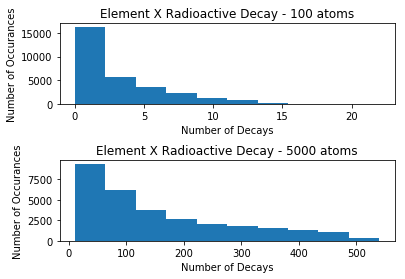

In [68]:
plt.subplot(2, 1, 1)
plt.hist(s1)
plt.xlabel("Number of Decays")
plt.ylabel("Number of Occurances")
plt.title("Element X Radioactive Decay - 100 atoms")
plt.subplot(2, 1, 2)
plt.hist(s2)
plt.xlabel("Number of Decays")
plt.ylabel("Number of Occurances")
plt.title("Element X Radioactive Decay - 5000 atoms")
plt.subplots_adjust(hspace=.7)

##### 6.) The probability of a certain number of atoms decaying in a time window can be solve analytically as: 

p = [ (alpha * n * T)<sup>n</sup> * e<sup>-alpha * n * T</sup> ] / n!

where T is the time window (10 seconds in our case), n is the number of atoms decaying, and alpha is our decay rate from earlier (0.01). What is the probability of 5 atoms decaying in 10 seconds?

In [69]:
p = ( (0.01*5*10)**(5) * math.exp(-0.01*5*10) ) / (5*4*3*2*1)
print("Probability of 5 atoms decaying in 10 seconds is ", p)

Probability of 5 atoms decaying in 10 seconds is  0.0001579506926334983


7.) How many times did 5 atoms actually decay in our simulations? Hint: if you have an list you can use the count() function to find number of occurances. For example, if we have a list named x and we'd like to find how many times 5 occurs, we can do: print(x.count(5))

In [70]:
print("With 100 atom sample we got", s1.count(5), "occurances of 5 atoms decaying in 10 seconds")
print("With 5000 atom sample we got", s2.count(5), "occurances of 5 atoms decaying in 10 seconds")

With 100 atom sample we got 1992 occurances of 5 atoms decaying in 10 seconds
With 5000 atom sample we got 0 occurances of 5 atoms decaying in 10 seconds


8.) Would you like to add anything to question 4?

The probability of seeing 5 atoms decay in 10 seconds is less than 0.015%. In 1000 simulations we wouldn't expect to this this happen much at all. Yet, in our simulation involving 100 atoms we saw this occuring 1992 times. Simulating 5000 atoms gives us a different picture.